In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers=pd.read_csv('dataset_num.csv')

In [3]:
customers_exl=pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
fraud=customers_exl['FraudFound_P'].values

In [5]:
customers['FraudFound_P']=fraud

In [6]:
df_test = pd.read_csv('output_round1.csv')

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Detected Fraud

In [8]:
fraud_count_dict = {}
for rep_number in np.unique(customers['RepNumber']):
    fraud_count_dict[rep_number] = customers[customers['RepNumber']==rep_number]['FraudFound_P'].value_counts()[1]
fraud_count = []
for index, row in customers.iterrows():
    fraud_count.append(fraud_count_dict[row['RepNumber']])
customers['rep_fraud'] = fraud_count    

In [9]:
from datetime import datetime, timedelta

In [10]:
customers['MonthClaimed'].value_counts()

6     1084
10    1038
9     1005
12     995
11     973
2      970
8      967
5      955
13     944
7      908
4      879
3      846
1        1
Name: MonthClaimed, dtype: int64

In [8]:
def correctMonth(month):
    if month ==2:
        return 1
    elif month==3:
        return 2
    elif month==4:
        return 3
    elif month==5:
        return 4
    elif month==6:
        return 5
    elif month==7:
        return 6
    elif month==8:
        return 7
    elif month==9:
        return 8
    elif month==10:
        return 9
    elif month==11:
        return 10
    elif month==12:
        return 11
    elif month==13:
        return 12
    else:
        return 0
customers['MonthClaimed']=customers['MonthClaimed'].apply(correctMonth) 

In [9]:
index=customers[customers['DayOfWeekClaimed']==1].index[0]
customers.drop(customers[customers['DayOfWeekClaimed']==1].index[0],inplace=True)
#customers.drop(customers[customers['MonthClaimed']==0].index[0],inplace=True)

In [10]:
customers_exl['DayOfWeekClaimed'].value_counts()

Monday       2811
Tuesday      2545
Wednesday    2232
Thursday     2000
Friday       1842
Saturday       94
Sunday         40
0               1
Name: DayOfWeekClaimed, dtype: int64

In [11]:
customers_exl.drop(customers_exl[customers_exl['DayOfWeekClaimed']==0].index[0],inplace=True)

In [12]:
def correctDate(date):
    if date ==2:
        return 1
    elif date==3:
        return 2
    elif date==4:
        return 3
    elif date==5:
        return 4
    elif date==6:
        return 5
    elif date==7:
        return 6
    elif date==8:
        return 7
customers['DayOfWeekClaimed']=customers['DayOfWeekClaimed'].apply(correctDate)    

In [13]:
daydict={
       1 : 'Monday',
       2 : 'Tuesday',
       3 : 'Wednesday',
       4 : 'Thursday',
       5 : 'Friday',
       6 : 'Saturday',
       7 : 'Sunday',
}

In [14]:
def parse_date(year, month_name, week_month, day):
    month = month_name
    first_date = datetime(year, month, 1)
    first_day = first_date.isoweekday()
    first_week_number = first_date.isocalendar()[1]
    if (first_week_number == 52):
        first_week_number = 1
    week_number = first_week_number + week_month - 1
    string_date = str(year)+'-'+str(week_number)+'-'+daydict.get(day)
    date = datetime.strptime(string_date, '%Y-%U-%A')
    return date

In [18]:
## Male --> 2
## Female --> 1
customers['Sex'].value_counts()

2    9767
1    1797
Name: Sex, dtype: int64

No handles with labels found to put in legend.


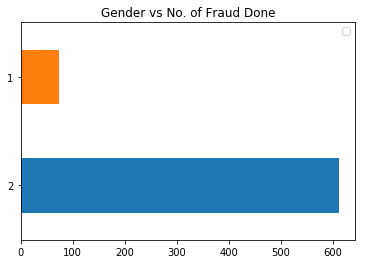

In [26]:
plt.title('Gender vs No. of Fraud Done')
plt.legend(l)
customers[customers['FraudFound_P']==1]['Sex'].value_counts().plot('barh')

In [23]:
print('Female',format((73/1797)*100,'.2f'))
print('Male',format((612/9767)*100,'.2f'))

Female 4.06
Male 6.27


In [ ]:
# Accident Claim Gap

In [18]:
gap = []
accident_dates = []
claim_dates = []
for index, row in customers.iterrows():
    accident_year = row['Year']
    if (row['Month'] <= row['MonthClaimed']):
        claim_year = accident_year
    else:
        claim_year = accident_year + 1
    
    accident_date = parse_date(accident_year, row['Month'], row['WeekOfMonth'], row['DayOfWeek'])
    claim_date = parse_date(claim_year, row['MonthClaimed'], row['WeekOfMonthClaimed'], row['DayOfWeekClaimed'])
    accident_dates.append(accident_date)
    claim_dates.append(claim_date)
    gap.append(abs((claim_date - accident_date).days))

In [19]:
customers['claim_gap'] = gap

# CLAIM AMOUNT TRUST

In [20]:
vehicle_price_dict = {
    'less than 20000': 20000,
    '20000 to 29000': 24500,
    '30000 to 39000': 34500,
    '40000 to 59000': 49500,
    '60000 to 69000': 64500,
    'more than 69000': 69000
}

In [21]:
claim_trustability = []

In [22]:
for index, row in customers_exl.iterrows():
    ct = vehicle_price_dict[row['VehiclePrice']] - row['ClaimSize']
    claim_trustability.append(ct)

In [23]:
len(claim_trustability)

11564

In [24]:
customers.shape

(11564, 38)

In [25]:
customers['Claim_Amount_Percent'] = claim_trustability

In [26]:
org_trustability = []


In [27]:
del customers['PolicyNumber']
del customers['Year']
del customers['Month']
del customers['MonthClaimed']
del customers['WeekOfMonth']
del customers['WeekOfMonthClaimed']
del customers['DayOfWeek']
del customers['DayOfWeekClaimed']
del customers['Age_na']
del customers['DriverRating_na']
del customers['PolicyType']
del customers['MaritalStatus']
del customers['AgentType']
del customers['WitnessPresent']
del customers['Days_Policy_Accident']
del customers['Days_Policy_Claim']
del customers['AgeOfPolicyHolder']

In [28]:
#del customers['RepNumber']
#del customers['ClaimSize']

In [29]:
Fraud=customers[customers['FraudFound_P']==1]
NotFraud=customers[customers['FraudFound_P']==0]
Y_fraud=Fraud['FraudFound_P'].values
Y_NotFraud=NotFraud['FraudFound_P'].values
del Fraud['FraudFound_P']
del NotFraud["FraudFound_P"]
del customers['FraudFound_P']

In [30]:
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(Fraud.values,Y_fraud,test_size=0.5)
X_train_Notfraud,X_test_Notfraud,Y_train_Notfraud,Y_test_Notfraud=train_test_split(NotFraud.values,Y_NotFraud,test_size=0.80)
X_train=np.concatenate([X_train_fraud,X_train_Notfraud])
Y_train=np.concatenate([Y_train_fraud,Y_train_Notfraud])
X_test=np.concatenate([X_test_fraud,X_test_Notfraud])
Y_test=np.concatenate([Y_test_fraud,Y_test_Notfraud])

In [31]:
df_new=pd.DataFrame(X_train)
df_new.columns=customers.columns
df_new['FraudFound_P']=Y_train
df_new = df_new.sample(frac=1).reset_index(drop=True)
Y_train=df_new['FraudFound_P'].values
del df_new['FraudFound_P']
X_train=df_new.values

In [32]:
import lightgbm as lgb
print("LightGBM version: {}".format(lgb.__version__))

LightGBM version: 2.2.2


/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [33]:
lgb_train = lgb.Dataset(X_train, Y_train, free_raw_data=False)

In [34]:
parameters = {'num_leaves': 2**6,
              'learning_rate': 0.01,
              'is_unbalance': True,
              'min_split_gain': 0.03,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 500

In [35]:
%%time
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

CPU times: user 6.05 s, sys: 85 ms, total: 6.13 s
Wall time: 827 ms


In [36]:
y_prob = clf.predict(X_test)

Y_pred = np.array([0 if i<0.5 else 1 for i in y_prob])

In [37]:
importances = clf.feature_importance()
tick_labels = customers.columns

In [38]:
feature_importances = pd.DataFrame()
feature_importances['Importance'] = importances
feature_importances['Feature'] = tick_labels
feature_importances.sort_values('Importance', inplace=True)

In [39]:
importances = feature_importances['Importance']
tick_labels = feature_importances['Feature']

In [40]:
threshold = 0.035

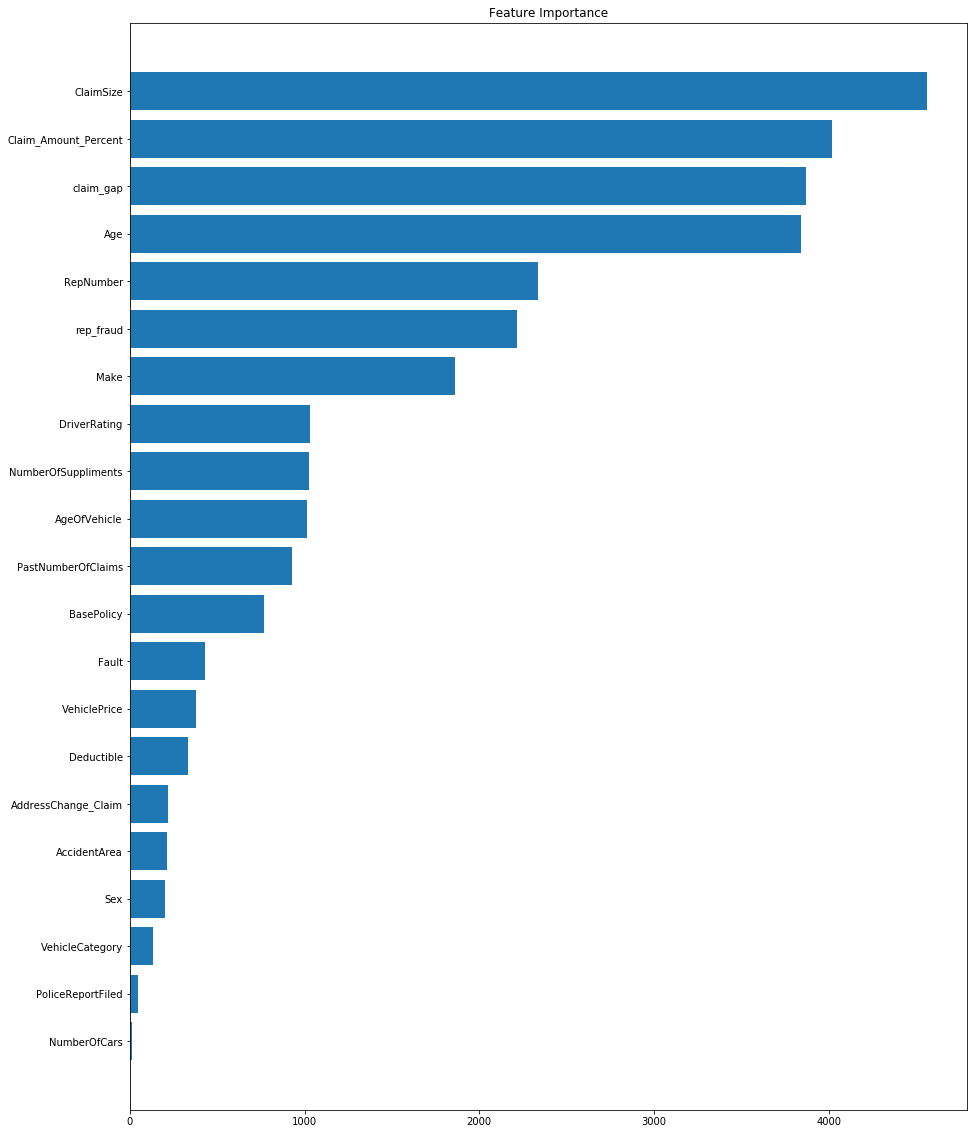

In [44]:
figure = plt.figure(figsize=(15,20))
plt.title('Feature Importance')
plt.barh(range(len(importances)), importances, tick_label=tick_labels)
plt.axvline(threshold,color='gray',linestyle='dashed')

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [43]:
customers['AgeOfPolicyHolder']

KeyError: 'AgeOfPolicyHolder'

In [ ]:
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))

In [ ]:
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))